In [12]:
# Calcula un índice por país de vulnerabilidad 
# socioeconómica ante riesgos físicos

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
import holoviews as hv
from scipy import stats

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

def hook_2(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.95*b, w, 0.05*h])
options_2 = { "colorbar": True, "linewidth": 0.1,
    "hooks": [hook_2], "ylim":(-62,85), "xlim":(-180,180), "clim": (0, 10),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m_2 = { "bgcolor": "lightgray", "fontscale": 0.3, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapas
#borders_path = ( "../../Bases_de_datos/Mapas/"
#    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
#borders = gpd.read_file(borders_path).drop(
#    columns = [ix] ).set_index("ISO_A3_EH")
#borders.index.name = ix
#borders = borders[ borders["ISO_N3_EH"] != "-99" ]
#borders = borders[ ~borders.index.duplicated() ]

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "UN/UNmap05_shp/BNDA05_CTY.shp" )
borders = gpd.read_file(borders_path)
    #).drop(columns = [ix]).set_index("ISO_A3_EH")
#borders.loc[borders["ISO3CD"]=="xAP", "ISO3CD"] = "IND"
#borders.loc[borders["ISO3CD"]=="xJK", "ISO3CD"] = "PAK"
#borders.loc[borders["ISO3CD"]=="xAC", "ISO3CD"] = "PAK"
#borders.loc[borders["ISO3CD"]=="ESH", "ISO3CD"] = "MAR"
borders = borders.set_index("ISO3CD")
borders.index.name = ix
#borders = borders[ borders["ISO_N3_EH"] != "-99" ]
#borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Nombres de variables a usar
vars =  [ "Life expectancy at birth", "log GNI per capita, PPP",
    "Gender Development index", "% rural population",
    "% population below 15 or above 65 years old" ]
vars_p = [ "Life expectancy at birth", "GNI per capita",
    "Gender Development index", "% rural population",
    "% population below 15 or above 65 years old" ]
var_i = [v + " index" for v in vars]

In [3]:
# Funciones a utilizar

# Mejora el formato de las tablas para su uso en documentos.
def display(vn, p = False, format = "{:.1f}",
    category = "", type = "category"):
    # vn:       variable principal
    # p:        indica si la variable es positiva
    # format:   formato a usar
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    #
    # regresa
    # disp:     objeto Display de Pandas o un Dataframe
    #           de pandas basado en la tabla de entrada

    # Países sin datos
    no_d = df_iso[ df_iso[vn].isnull() ].shape[0]
    print( f"Countries without data: {no_d} countries" )

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "index":
        disp = df_iso.loc[ df_iso[vn].notnull(),
            ["name", vn] + var_i ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    # Una variable principal
    elif type == "category":
        disp = df_iso.loc[ df_iso[vn].notnull(), ["name", vn] ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    # Lista de países más altos
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Most vulnerable countries: {', '.join(c_list)}")

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso[cat], [vn] + var_i ].mean()
            # Una variable principal
            elif type == "category":
                disp.iloc[r, 1] = df_iso.loc[df_iso[cat], vn].mean()
            c_list = list( df_iso.loc[df_iso[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"Most vulnerable {cat}: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso["region"] == cat, [vn] + var_i ].mean()
            # Una variable principal
            elif type == "category":
                disp.iloc[r, 1] = df_iso.loc[
                    df_iso["region"] == cat, vn].mean()

    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "index":
        disp.iloc[r, 1:] = df_iso[ [vn] + var_i ].mean()
    elif type == "category":
        disp.iloc[r, 1] = df_iso[vn].mean()
    
    # Renombramos columnas
    # Resumen de variables
    if   type == "index":
        cols = ["Name", vn] + var_i
    # Una variable principal
    elif type == "category":
        cols = [ "Name", f"{category}" ]
    disp.columns = cols

    # Damos formato
    # Resumen de variables
    if   type == "index":
        disp = disp.style.format(
            dict(zip(cols[1:], ["{:.1f}"] * len(cols[1:]))) )
    # Una variable principal
    elif type == "category":
        disp = disp.style.format( { cols[1]: format } )

    # Regresamos la tabla
    return disp

min: 53.0, max: 85.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Life expectancy at birth)
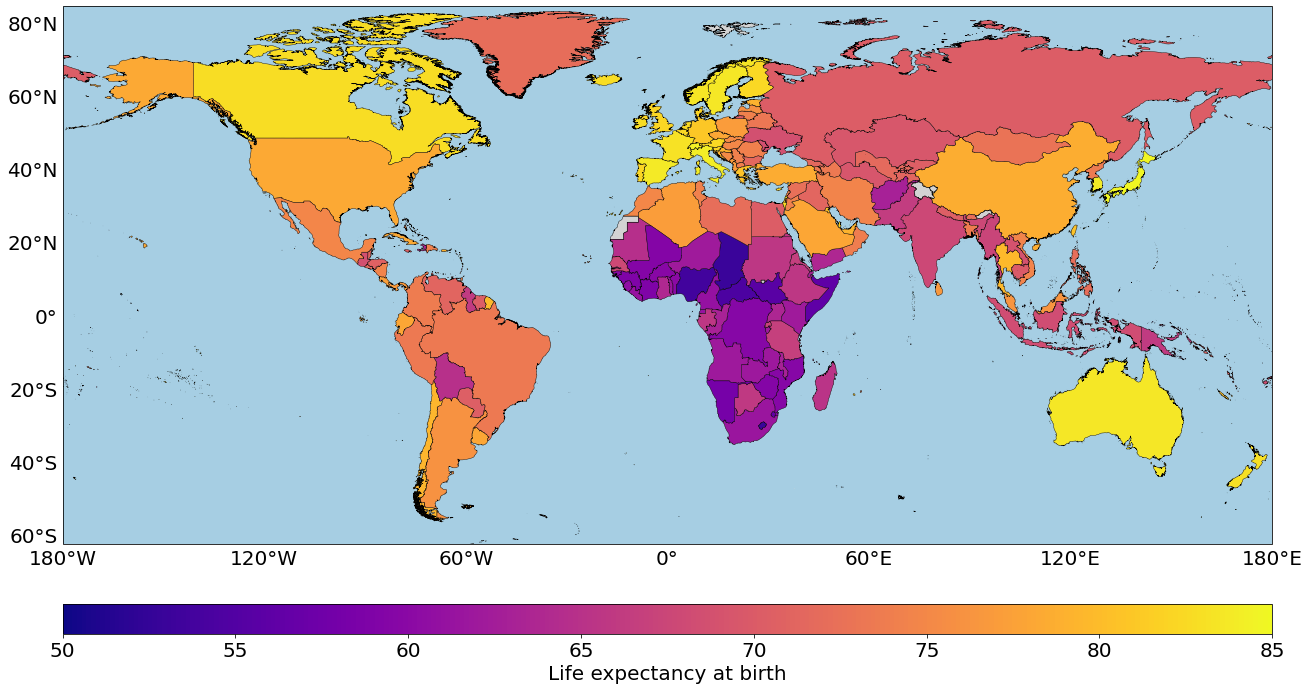

Countries without data: 0 countries
Most vulnerable countries: Chad, Lesotho, Nigeria, Central African Republic, South Sudan
Most vulnerable SIDS: Guinea-Bissau, Comoros, Haiti, Nauru, Tuvalu
Most vulnerable LDC: Chad, Lesotho, Central African Republic, South Sudan, Somalia
Most vulnerable LLDC: Lesotho, Chad, Central African Republic, South Sudan, Eswatini


,Name,Life expectancy at birth
0,Chad,53.0
1,Lesotho,53.0
2,Nigeria,53.6
3,Central African Republic,54.5
4,South Sudan,55.6
5,Somalia,56.1
6,SIDS,73.3
7,LDC,63.2
8,LLDC,65.2
9,Asia,74.7


In [4]:
# Primera categoría
id = "GDI_HDI"

# Cargamos el archivo
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = ix ).drop(columns = ["Source"])


# Life expectancy at birth
i = 0
df_iso[vars[i]] = df[vars[i]]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Mónaco por motivos de visualización
borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 50
max = 85
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = True, category = vars[i])
disp

min: 0.2919861423696652, max: 1.0372014880666531


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (log GNI per capita, PPP)
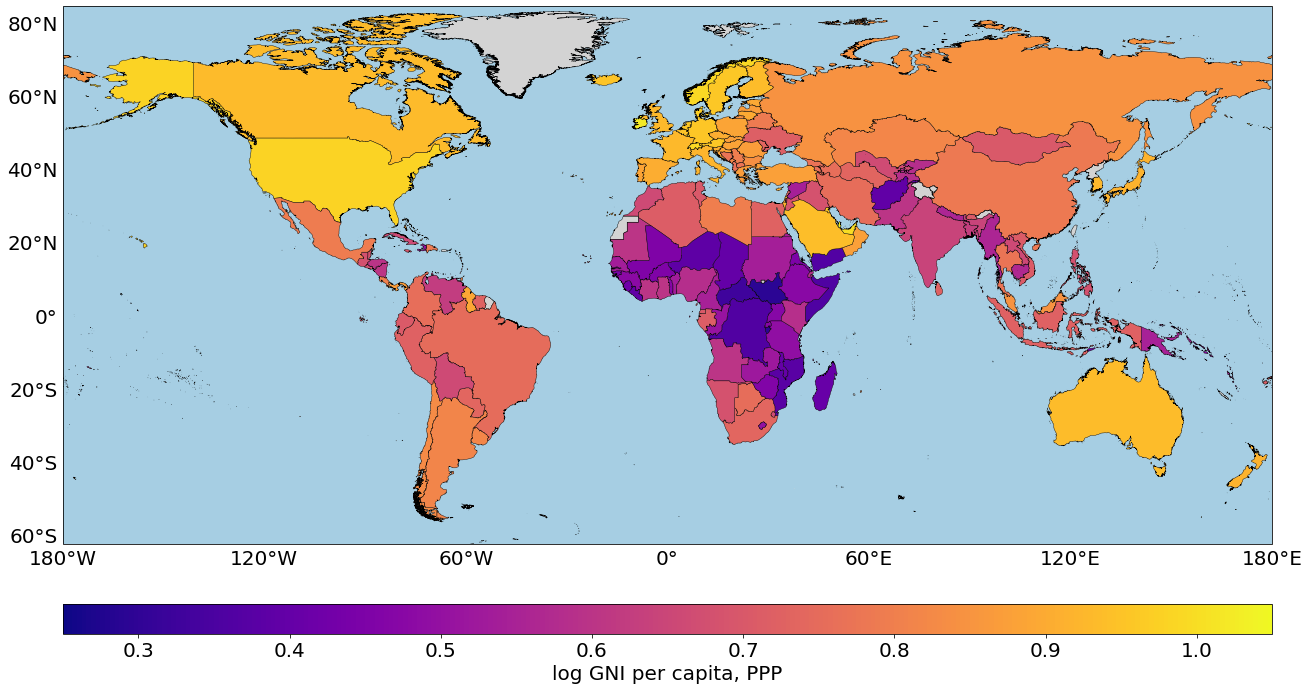

Countries without data: 44 countries
Most vulnerable countries: South Sudan, Burundi, Central African Republic, Somalia, Congo, Democratic Republic of the
Most vulnerable SIDS: Timor-Leste, Guinea-Bissau, Solomon Islands, Haiti, Vanuatu
Most vulnerable LDC: South Sudan, Burundi, Central African Republic, Somalia, Congo, Democratic Republic of the
Most vulnerable LLDC: South Sudan, Burundi, Central African Republic, Niger, Afghanistan


,Name,GNI per capita
0,South Sudan,691
1,Burundi,712
2,Central African Republic,869
3,Somalia,"1,072"
4,"Congo, Democratic Republic of the","1,080"
5,Yemen,"1,106"
6,SIDS,"14,348"
7,LDC,"2,725"
8,LLDC,"6,770"
9,Asia,"23,336"


In [5]:
# log GNI per capita, PPP
i = 1

df_iso["GNI per capita"] = df["GNI per capita"]
df_iso[vars[i]] = ( np.log( df.reset_index().set_index(ix)["GNI per capita"] )
    - np.log(100) ) / np.log(750)

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Lietchtenstein por motivos de visualización
borders.loc["LIE"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 0.25
max = 1.05
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display( "GNI per capita", p = True,
    format = "{:,.0f}", category = "GNI per capita" )
disp

min: 0.456, max: 1.037


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gender Development index)
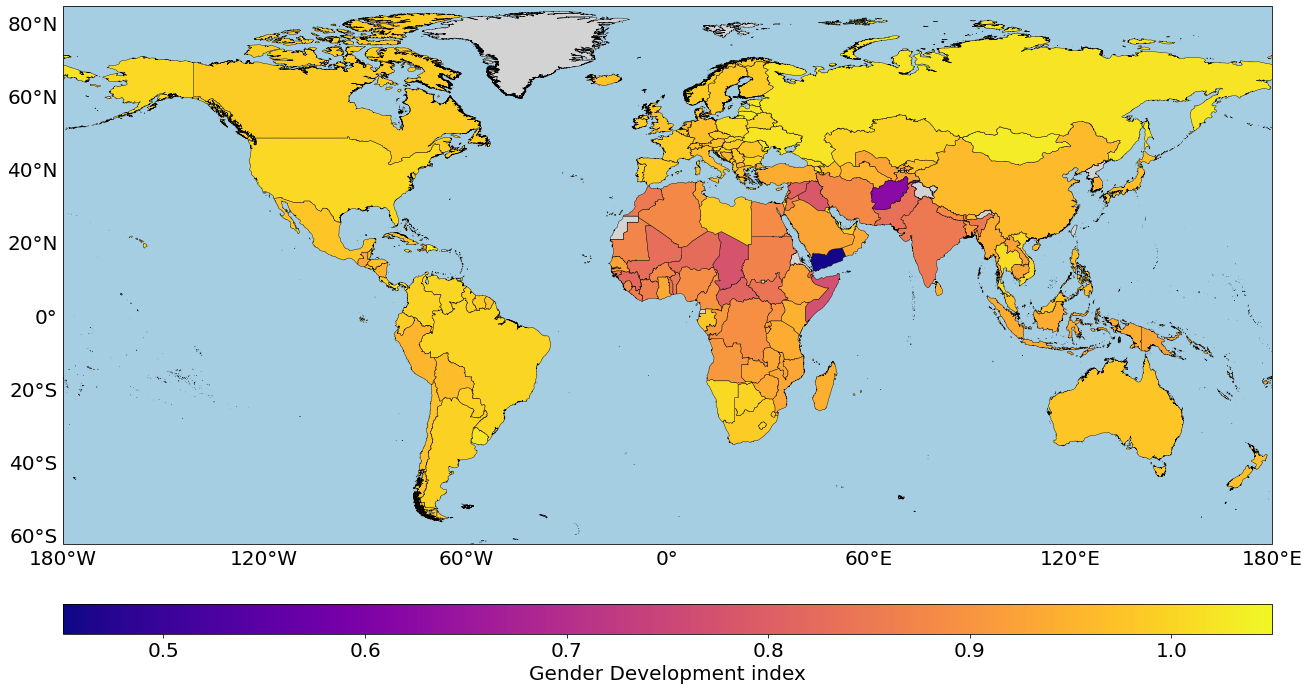

Countries without data: 46 countries
Most vulnerable countries: Yemen, Afghanistan, Somalia, Chad, Iraq
Most vulnerable SIDS: Kiribati, Guinea-Bissau, Timor-Leste, Sao Tome and Principe, Comoros
Most vulnerable LDC: Yemen, Afghanistan, Somalia, Chad, Central African Republic
Most vulnerable LLDC: Afghanistan, Chad, Central African Republic, Niger, Mali


,Name,Gender Development index
0,Yemen,0.456
1,Afghanistan,0.622
2,Somalia,0.769
3,Chad,0.776
4,Iraq,0.786
5,Syrian Arab Republic,0.805
6,SIDS,0.971
7,LDC,0.874
8,LLDC,0.923
9,Asia,0.928


In [6]:
# Gender Development index
i = 2

df_iso[vars[i]] = df["GDI"]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Seychelles por motivos de visualización
borders.loc["SYC"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 0.45
max = 1.05
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display( vars[i], p = True, format = "{:.3f}", category = vars[i] )
disp

min: 0.0, max: 86.27700417359999


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% rural population)
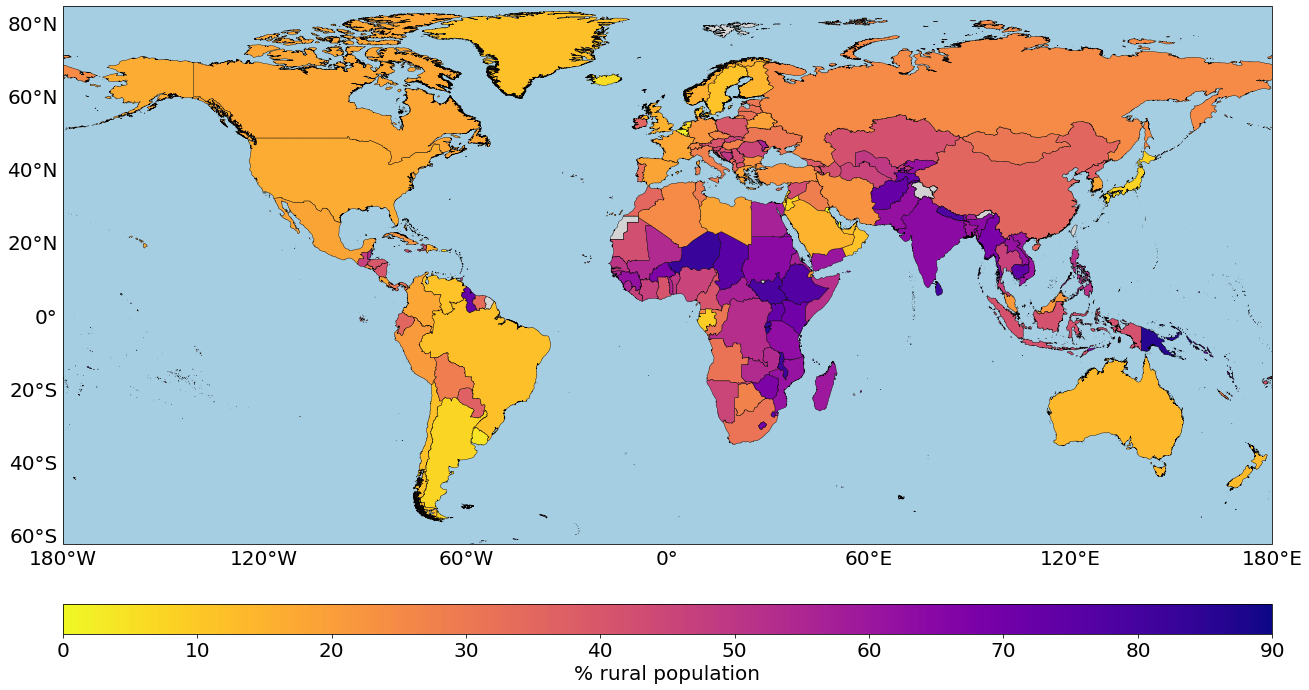

Countries without data: 24 countries
Most vulnerable countries: Papua New Guinea, Liechtenstein, Burundi, Niger, Samoa
Most vulnerable SIDS: Papua New Guinea, Samoa, Saint Lucia, Tonga, Micronesia (Federated States of)
Most vulnerable LDC: Burundi, Niger, Rwanda, Malawi, South Sudan
Most vulnerable LLDC: Burundi, Niger, Rwanda, Malawi, South Sudan


,Name,% rural population
0,Papua New Guinea,86.3
1,Liechtenstein,85.4
2,Burundi,85.2
3,Niger,82.9
4,Samoa,82.5
5,Rwanda,82.1
6,SIDS,40.6
7,LDC,59.5
8,LLDC,60.0
9,Asia,37.4


In [7]:
# Cargamos el archivo de población
id = "Population"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "Country Code")
df_i.index.name = ix

v_pop = [ "SP.RUR.TOTL", "SP.POP.0014.TO",#"SP.POP.0004.FE", "SP.POP.0004.MA",
    "SP.POP.65UP.TO", "SP.POP.TOTL" ]
for v in v_pop:
    df[v] = df_i.loc[ df_i["Indicator Code"] == v, "2023" ]

# Rurality
i = 3

df_iso[vars[i]] = 100 * df[v_pop[0]] / df[v_pop[3]]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Lietchtenstein por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 0
max = 90
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display( vars[i], category = vars[i] )
disp

min: 17.081958975802024, max: 51.15556487974437


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% population below 15 or above 65 years old)
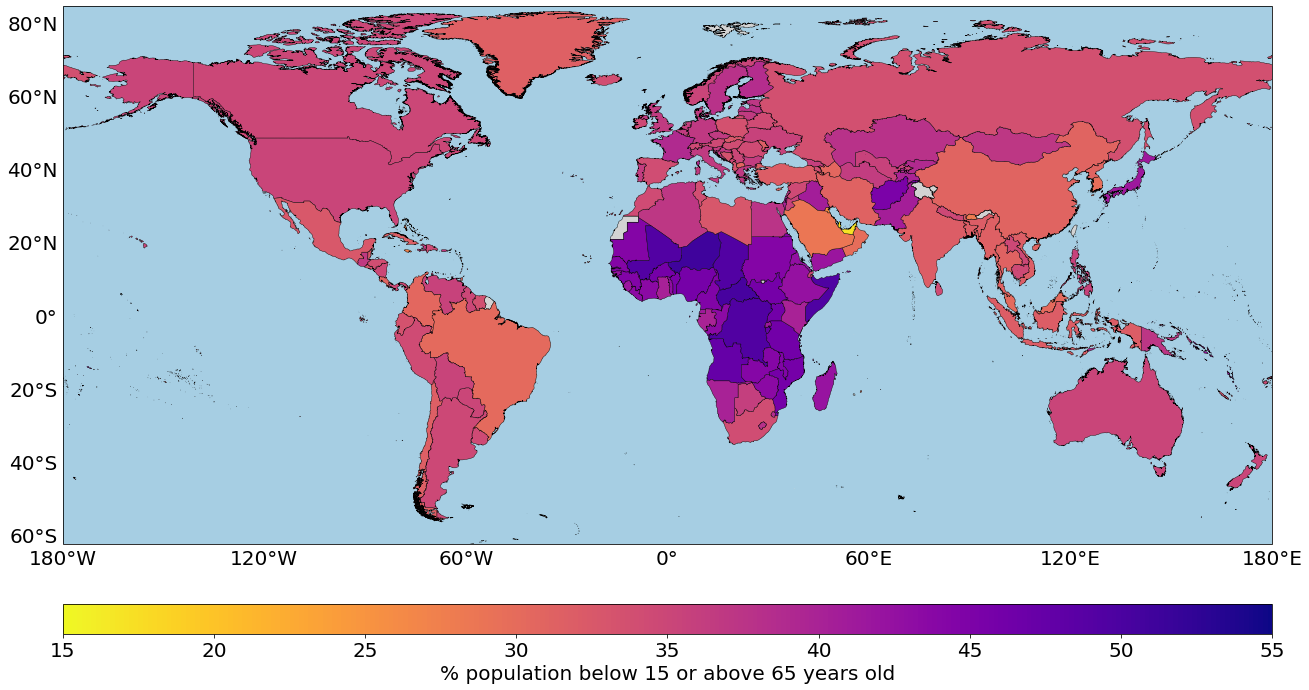

Countries without data: 23 countries
Most vulnerable countries: Niger, Central African Republic, Somalia, Congo, Democratic Republic of the, Chad
Most vulnerable SIDS: Vanuatu, Samoa, Sao Tome and Principe, Guinea-Bissau, Solomon Islands
Most vulnerable LDC: Niger, Central African Republic, Somalia, Congo, Democratic Republic of the, Chad
Most vulnerable LLDC: Niger, Central African Republic, Chad, Mali, Burundi


,Name,% population below 15 or above 65 years old
0,Niger,51.2
1,Central African Republic,50.4
2,Somalia,49.6
3,"Congo, Democratic Republic of the",49.4
4,Chad,49.4
5,Mali,49.3
6,SIDS,34.1
7,LDC,42.9
8,LLDC,40.0
9,Asia,33.2


In [8]:
# Age dependency
i = 4

df_iso[vars[i]] = 100 * df[v_pop[1:3]].sum(axis = 1) / df[v_pop[3]]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Monaco por motivos de visualización
borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
min = 15
max = 55
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display( vars[i], category = vars[i] )
disp

In [ ]:
# Índice de vulnerabilidad socioeconómica
index_n = "Social vulnerability index, physical climate impacts"

# Cálculo del índice para cada categoría
# Países con al menos 4 valores
df_iso = df_iso[ df_iso[vars].count(axis = 1) > 3 ].copy()
# Normalización 0-10
for i, v in enumerate(vars):
    df_iso[ var_i[i] ] = stats.percentileofscore( df_iso[ vars[i] ],
        df_iso[ vars[i] ], nan_policy = "omit" ) / 10
    if v in vars[0:3]: df_iso[ var_i[i] ] = 10 - df_iso[ var_i[i] ]

# Cálculo del índice
df_iso[index_n] = df_iso[var_i].mean(axis = 1)
# Normalización 0-10
min_v = df_iso[index_n].min()
max_v = df_iso[index_n].max()
rng_v = max_v - min_v
df_iso[ index_n ] = 10 * ( df_iso[index_n] - min_v ) / rng_v

# Mapa
borders[index_n] = df_iso[index_n]
borders.loc["ESH", index_n] = borders.loc["MAR", index_n] 
borders.loc["xAP", index_n] = 0.5*(borders.loc["PAK", index_n]+borders.loc["CHN", index_n])
borders.loc["xJK", index_n] = 0.5*(borders.loc["PAK", index_n]+borders.loc["PAK", index_n])
borders.loc["xAC", index_n] = 0.5*(borders.loc["PAK", index_n]+borders.loc["PAK", index_n])
borders.loc["xAB", index_n] = 0.5*(borders.loc["SSD", index_n].mean()+borders.loc["SDN", index_n].mean())
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(index_n, range = (0, 10.0001) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(index_n, range = (0, 10.0001) )
    ).opts( cmap = "plasma_r", **options_2 )
map = ( ocean * map_v ).opts( **options_m_2 )
hv.render(map).savefig( "../graphs/Physical_vulnerability_index.png",
    bbox_inches = "tight", dpi=6000 )

# Guardamos el archivo
df_iso[["name", index_n, "GNI per capita"] + vars + var_i].to_csv(
    "../share/Indexes/Physical_vulnerability_index.csv" )

# Países más vulnerables
disp = display( index_n, type = "index" )
disp

Countries without data: 0 countries
Most vulnerable countries: Chad, South Sudan, Niger, Central African Republic, Somalia
Most vulnerable SIDS: Guinea-Bissau, Comoros, Timor-Leste, Papua New Guinea, Vanuatu
Most vulnerable LDC: Chad, South Sudan, Niger, Central African Republic, Somalia
Most vulnerable LLDC: Chad, South Sudan, Niger, Central African Republic, Afghanistan


,Name,"Social vulnerability index, physical climate impacts",Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
0,Chad,10.0,9.9,9.4,9.8,9.2,9.8
1,South Sudan,10.0,9.7,9.9,9.4,9.5,9.5
2,Niger,9.9,8.6,9.6,9.5,9.8,10.0
3,Central African Republic,9.7,9.8,9.8,9.6,7.4,9.9
4,Somalia,9.6,9.7,9.8,9.8,6.9,9.9
5,Afghanistan,9.5,8.4,9.5,9.9,8.9,9.2
6,SIDS,5.0,5.5,5.5,4.2,6.2,4.1
7,LDC,8.3,8.1,8.6,8.0,7.5,8.0
8,LLDC,7.1,7.4,7.2,6.0,7.5,6.7
9,Asia,4.5,4.1,4.6,5.6,4.9,3.7


In [ ]:
# Información para uno varios países en específico
country = ["BRA", "COL"]

# Promedio
disp = df_iso.loc[country, ["name", index_n] + var_i + vars_p]
disp.T.iloc[1:].mean(axis = 1)
# Detalle
#disp = df_iso.loc[country, ["name", index_n] + vars_p]
#cols = ["Name", index_n] + vars_p
#disp.columns = cols
#disp = disp.style.format( { cols[1]: "{:.1f}",
#    cols[2]: "{:.1f}", cols[3]: "{:,.0f}", cols[4]: "{:.3f}",
#    cols[5]: "{:.1f}", cols[6]: "{:.1f}" } )
#disp.T

Social vulnerability index, physical climate impacts     2.398109
Life expectancy at birth index                           4.481865
log GNI per capita, PPP index                            4.404145
Gender Development index index                           1.671123
% rural population index                                 1.658031
% population below 15 or above 65 years old index         1.11399
Life expectancy at birth                                    73.55
GNI per capita                                            14815.0
Gender Development index                                    0.999
% rural population                                         14.929
% population below 15 or above 65 years old             30.352767
dtype: object